# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

In [1]:
import pandas as pd
import requests
import numpy as np
import json
from bs4 import BeautifulSoup

In [121]:
twitch_channels = ["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]

for t in twitch_channels:
    r = requests.get(f"https://wind-bow.glitch.me/twitch-api/channels/{t}")
    j = json.loads(r.content)
    #print(j['display_name'])

# Viewing which links actually give data
# Looks like only 8 channels are found to have data

#ESL_SC2
#OgamingSC2
#cretetion
#FreeCodeCamp
#storbeck
#Habathcx
#RobotCaleb
#noobs2ninjas

#So I'll work with these

In [130]:
twitch_c = ["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas"]

#Creating a list of dicts
channel_data = [] 

#Looping through to get all channel info and turn into dict
for t in twitch_c:
    response = requests.get(f"https://wind-bow.glitch.me/twitch-api/channels/{t}")
    jdict = json.loads(response.content)
    channel_data.append(jdict)

In [137]:
#Simply creating a dataframe and removing unwanted cols
df = pd.DataFrame(channel_data)
twitch_channel_info = df.drop(['mature', 'broadcaster_language','language','created_at','updated_at','delay','logo',
'banner','video_banner','background','profile_banner','profile_banner_background_color','partner','url','_links','name'], axis = 1) 


In [138]:
twitch_channel_info

,status,display_name,game,_id,views,followers
0,RERUN: StarCraft 2 - Terminator vs. Parting (P...,ESL_SC2,StarCraft II,30220059,60991791,135394
1,UnderDogs - Rediffusion - Qualifier.,OgamingSC2,StarCraft II,71852806,20694507,40895
2,It's a Divison kind of Day,cretetion,Tom Clancy's The Division,90401618,11631,908
3,Greg working on Electron-Vue boilerplate w/ Ak...,FreeCodeCamp,Creative,79776140,163747,10122
4,None,storbeck,None,86238744,1019,10
5,Massively Effective,Habathcx,None,6726509,764,14
6,Code wrangling,RobotCaleb,Programming,54925078,4602,20
7,Building a new hackintosh for #programming and...,noobs2ninjas,Creative,82534701,48102,835


# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).

### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?

Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

# 2.1

In [68]:
#App ids
candyid = 553834731
tinderid = 547702041
facebookid = 284882215
twitterid = 333903271

app_id_list = [candyid, tinderid, facebookid, twitterid] 

#English Country codes
en_countries = ['us', 'gb', 'ca', 'au']
page_list = [1,2]

# English Facebook reviews

In [182]:
def facebook(id):
  df_total = pd.DataFrame(columns = ['im:version','im:rating', 'title', 'content'])
  for lang in en_countries:
    for page in page_list:
      data = requests.get(f"https://itunes.apple.com/{lang}/rss/customerreviews/id={id}/page={page}/sortby=mostrecent/json")
      d = json.loads(data.content)
      df = pd.DataFrame(d['feed']['entry'])
      df['title'] = df['title'].apply(lambda x: x['label'])
      df['im:version'] = df['im:version'].apply(lambda x: x['label'])
      df['im:rating'] = df['im:rating'].apply(lambda x: x['label'])
      df['content'] = df['content'].apply(lambda x: x['label'])
      df = df.drop(['author', 'id', 'link', 'im:voteSum', 'im:contentType', 'im:voteCount'], axis = 1)
      df_total = pd.concat([df_total, df], axis = 0)
  return df_total
fb = facebook(284882215)
fb = fb.reset_index()
fb

,index,im:version,im:rating,title,content
0,0,306.0,1,Fakebook,Fakebook only allows videos from BLM and Democ...
1,1,306.0,1,Crap,Garbage social media platform face book is in ...
2,2,306.0,1,Censorship!!,There are many agendas to this social platform...
3,3,306.0,1,They need to fix this,I keep getting an unexpected login error and c...
4,4,306.0,2,Trouble logging in through App,I am really having trouble logging in through ...
...,...,...,...,...,...
395,45,306.0,1,Blocked Australian Health Pages,Blocked Australian Health Pages in one of the ...
396,46,306.0,1,Aussie Aussie Aussie,100% one star review for Facebook censorship 🤙🏼
397,47,306.0,1,News Censorship in Australia,The title says it all
398,48,306.0,1,Just awfully awful!,Restricting and blocking the vital access of n...


# English Candy Crush reviews

In [183]:
def candy_crush(id):
  df_total = pd.DataFrame(columns = ['im:version','im:rating', 'title', 'content'])
  for lang in en_countries:
    for page in page_list:
      data = requests.get(f"https://itunes.apple.com/{lang}/rss/customerreviews/id={id}/page={page}/sortby=mostrecent/json")
      d = json.loads(data.content)
      df = pd.DataFrame(d['feed']['entry'])
      df['title'] = df['title'].apply(lambda x: x['label'])
      df['im:version'] = df['im:version'].apply(lambda x: x['label'])
      df['im:rating'] = df['im:rating'].apply(lambda x: x['label'])
      df['content'] = df['content'].apply(lambda x: x['label'])
      df = df.drop(['author', 'id', 'link', 'im:voteSum', 'im:contentType', 'im:voteCount'], axis = 1)
      df_total = pd.concat([df_total, df], axis = 0)
  return df_total
cc = candy_crush(553834731)
cc = cc.reset_index()
cc

,index,im:version,im:rating,title,content
0,0,1.196.0.1,1,Greedy replaces Fun!,I am now on level 3359it’s impossible with the...
1,1,1.196.0.1,2,Fun game but...,Every time I make a purchase it robs me and th...
2,2,1.196.0.1,4,Trouble,Unable to open App for the past week
3,3,1.196.0.1,5,Bless,Amazing
4,4,1.196.0.1,4,Slightly Addictive,This game has come a long way and I love the m...
...,...,...,...,...,...
395,45,1.185.0.1,3,Giveth then taketh away!!,Been playing this for years. Had some great st...
396,46,1.185.0.1,1,The more you win the more money they want,"I’ve been playing this game for a solid year, ..."
397,47,1.185.0.1,5,MariamBanat,MariamBanat
398,48,1.185.0.1,4,ABC News,❤️❤️❤️❤️❤️👄👄👄❤️❤️❤️❤️❤️❤️


# English Tinder reviews

In [191]:
def tinder(id):
  df_total = pd.DataFrame(columns = ['im:version','im:rating', 'title', 'content'])
  for lang in en_countries:
    for page in page_list:
      data = requests.get(f"https://itunes.apple.com/{lang}/rss/customerreviews/id={id}/page={page}/sortby=mostrecent/json")
      d = json.loads(data.content)
      df = pd.DataFrame(d['feed']['entry'])
      df['title'] = df['title'].apply(lambda x: x['label'])
      df['im:version'] = df['im:version'].apply(lambda x: x['label'])
      df['im:rating'] = df['im:rating'].apply(lambda x: x['label'])
      df['content'] = df['content'].apply(lambda x: x['label'])
      df = df.drop(['author', 'id', 'link', 'im:voteSum', 'im:contentType', 'im:voteCount'], axis = 1)
      df_total = pd.concat([df_total, df], axis = 0)
  return df_total
tin = tinder(547702041)
tin = tin.reset_index()
tin

,index,im:version,im:rating,title,content
0,0,12.2.0,5,Found the love of my life,"Didn’t expect to fall in love, but ended up fi..."
1,1,12.2.0,5,Review,"Good app , professionally made up"
2,2,12.2.0,1,Don’t waste your time or money,It was alright for a while. Until I got banned...
3,3,12.2.0,1,Profile banned?,I don’t recall ever going against the policy o...
4,4,12.2.0,1,Shadow ban,Shadow banned for no reason months after I del...
...,...,...,...,...,...
395,45,11.31.0,1,Always crashing and buggy..,Updated to an iPhone 12 pro cause it was so la...
396,46,11.31.0,1,Recently active doesn’t work,"Recently active green dots no longer show, wor..."
397,47,11.31.0,1,Banned for No Reason,I’ve had the app for literally 24 hours and ha...
398,48,11.31.0,2,So many fake profiles,Used to be minimal but there’s about 25% fake ...


# English Twitter reviews

In [185]:
def twitter(id):
  df_total = pd.DataFrame(columns = ['im:version','im:rating', 'title', 'content'])
  for lang in en_countries:
    for page in page_list:
      data = requests.get(f"https://itunes.apple.com/{lang}/rss/customerreviews/id={id}/page={page}/sortby=mostrecent/json")
      d = json.loads(data.content)
      df = pd.DataFrame(d['feed']['entry'])
      df['title'] = df['title'].apply(lambda x: x['label'])
      df['im:version'] = df['im:version'].apply(lambda x: x['label'])
      df['im:rating'] = df['im:rating'].apply(lambda x: x['label'])
      df['content'] = df['content'].apply(lambda x: x['label'])
      df = df.drop(['author', 'id', 'link', 'im:voteSum', 'im:contentType', 'im:voteCount'], axis = 1)
      df_total = pd.concat([df_total, df], axis = 0)
  return df_total
twit = twitter(333903271)
twit = twit.reset_index()
twit

,index,im:version,im:rating,title,content
0,0,8.54.5,1,Communist,This company is anti free speech. Communist ar...
1,1,8.54.5,1,Too many “recommended topics”,Everyday you average 4 “recommended topic” twe...
2,2,8.54.5,1,Stop the ideological censorship,"You are the Press, directly from the Doublespe..."
3,3,8.54.5,1,Cesspool,If I wanted to be on state run media id sign u...
4,4,8.54.5,5,Twitter,I love this app.
...,...,...,...,...,...
395,45,8.48,1,Stop Banning Conservatives,The unconstitutional censorship of conservativ...
396,46,8.48,1,Propaganda machine,A dangerous platform that has turned into a pr...
397,47,8.48,1,Political bias,Love how Twitter censors conservative content ...
398,48,8.48,1,Can’t do anything not even deactivate my account.,I’ve been trying to figure out how to contact ...


# 2.2

In [208]:
fb['im:rating'] = fb['im:rating'].astype(float)
cc['im:rating'] = cc['im:rating'].astype(float)
tin['im:rating'] = tin['im:rating'].astype(float)
twit['im:rating'] = twit['im:rating'].astype(float)

# Average Ratings per version

im:version
305.0    1.00000
306.0    1.24557
Name: im:rating, dtype: float64


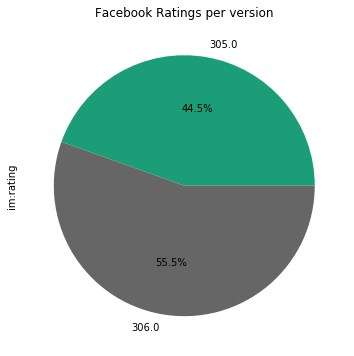

In [187]:
#Facebook
grouped = fb.groupby('im:version')
facebook_ratings = grouped['im:rating'].agg(np.mean)

facebook_ratings.plot(kind='pie', x='im:version', y='im:rating', title = 'Facebook Ratings per version', 
cmap='Dark2', autopct="%.1f%%", figsize = (10,6), legend=False)
print(facebook_ratings)

im:version
1.184.1.2    4.000000
1.185.0.1    2.666667
1.186.0.3    3.000000
1.187.1.1    2.000000
1.188.0.4    2.615385
1.189.0.2    2.333333
1.190.0.2    2.500000
1.191.0.2    2.750000
1.192.0.1    2.703704
1.193.0.2    3.000000
1.194.0.2    2.931034
1.195.1.1    2.435897
1.196.0.1    2.986395
Name: im:rating, dtype: float64


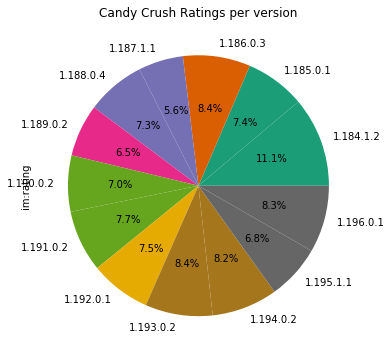

In [188]:
#Candy Crush
grouped = cc.groupby('im:version')
candy_ratings = grouped['im:rating'].agg(np.mean)

candy_ratings.plot(kind='pie', x='im:version', y='im:rating', title = 'Candy Crush Ratings per version', 
cmap='Dark2', autopct="%.1f%%", figsize = (10,6), legend=False)
print(candy_ratings)

im:version
           1.000000
11.31.0    1.651163
12.1.0     1.438424
12.2.0     1.601307
Name: im:rating, dtype: float64


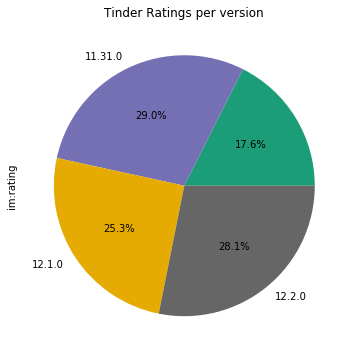

In [212]:
# Tinder
grouped = tin.groupby('im:version')
tinder_ratings = grouped['im:rating'].agg(np.mean)

tinder_ratings.plot(kind='pie', x='im:version', y='im:rating', title = 'Tinder Ratings per version', 
cmap='Dark2', autopct="%.1f%%", figsize = (10,6), legend=False)
print(tinder_ratings)

#There happens to be an unnamed version in the data
#doesnt change much

im:version
8.48      1.000000
8.50      1.000000
8.51      1.769231
8.52      2.111111
8.52.1    2.740157
8.53      3.083333
8.54      2.817073
8.54.5    2.677419
Name: im:rating, dtype: float64


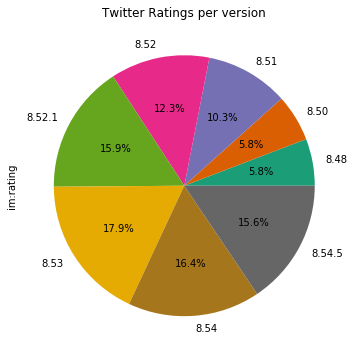

In [192]:
# Twitter
grouped = twit.groupby('im:version')
twitter_ratings = grouped['im:rating'].agg(np.mean)

twitter_ratings.plot(kind='pie', x='im:version', y='im:rating', title = 'Twitter Ratings per version', 
cmap='Dark2', autopct="%.1f%%", figsize = (10,6), legend=False)
print(twitter_ratings)

# 2.3

In [209]:
fb5 = fb.loc[fb['im:rating'] == 5]
fb1 = fb.loc[fb['im:rating'] == 1]

cc5 = cc.loc[cc['im:rating'] == 5]
cc1 = cc.loc[cc['im:rating'] == 1]

twit5 = twit.loc[twit['im:rating'] == 5]
twit1 = twit.loc[twit['im:rating'] == 1]

tin5 = tin.loc[tin['im:rating'] == 5]
tin1 = tin.loc[tin['im:rating'] == 1]

0      5.0
1      5.0
2      1.0
3      1.0
4      1.0
      ... 
395    1.0
396    1.0
397    1.0
398    2.0
399    1.0
Name: im:rating, Length: 400, dtype: float64

# Facebook most common words for 5 star and 1 star ratings

In [194]:
from collections import Counter 
fb_5 = Counter(fb5['title'])
most_occur = fb_5.most_common(5) 
print(most_occur) 

[('Thank you', 1), ('Ariana', 1), ('Video', 1), ('Holà', 1), ('Help', 1)]


In [195]:
fb_1 = Counter(fb1['title'])
most_occur = fb_1.most_common(5) 
print(most_occur) 

[('Censorship', 16), ('Facebook', 5), ('Crap', 4), ('Fakebook', 2), ('Horrible', 2)]


# candy crush most common words for 5 star and 1 star ratings

In [196]:
cc_5 = Counter(cc5['title'])
most_occur = cc_5.most_common(5) 
print(most_occur) 

[('Candy crush', 5), ('Candy Crush', 3), ('Won’t open', 2), ('Candy crush saga', 2), ('Crashing', 2)]


In [197]:
cc_1 = Counter(cc1['title'])
most_occur = cc_1.most_common(5) 
print(most_occur) 

[('Candy crush', 5), ('Not loading', 2), ('Rigged', 2), ('Ads', 2), ('Greedy replaces Fun!', 1)]


# twitter most common words for 5 star and 1 star ratings

In [198]:
twit_5 = Counter(twit5['title'])
most_occur = twit_5.most_common(5) 
print(most_occur) 

[('Twitter', 8), ('Review', 3), ('Rate', 2), ('Good', 2), ('Twitter Review', 2)]


In [199]:
twit_1 = Counter(twit1['title'])
most_occur = twit_1.most_common(5) 
print(most_occur) 

[('Censorship', 6), ('Twitter', 3), ('Review', 2), ('Communist', 1), ('Too many “recommended topics”', 1)]


# Tinder most common words for 5 star and 1 star ratings

In [210]:
tin_5 = Counter(tin5['title'])
most_occur = tin_5.most_common(5) 
print(most_occur) 

[('Found the love of my life', 1), ('Review', 1), ('Amazing app', 1), ('Death is imminent', 1), ('Love, passion, ecstasy', 1)]


In [211]:
tin_1 = Counter(tin1['title'])
most_occur = tin_1.most_common(5) 
print(most_occur) 

[('Banned for no reason', 12), ('banned for no reason', 4), ('Doesn’t work', 3), ('Banned', 3), ('Shadow ban', 2)]


# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`